<a href="https://colab.research.google.com/github/Camillabgarcia/data_science/blob/main/Testando_hipoteses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# carregando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Leitura dos dados

# idade de aponsentadoria
dados_idade_aposentadoria = pd.read_csv("/content/dados_idade_aposentadoria.csv")

# Tempo de Vida de uma Lâmpada
dados_vida_lampada = pd.read_csv("/content/dados_vida_lampada.csv")

# Altura dos funcionarios
dados_alturas = pd.read_csv("/content/dados_alturas.csv")

In [ ]:
dados_alturas.head()

,alturas
0,167.52
1,185.21
2,172.74
3,171.52
4,157.75


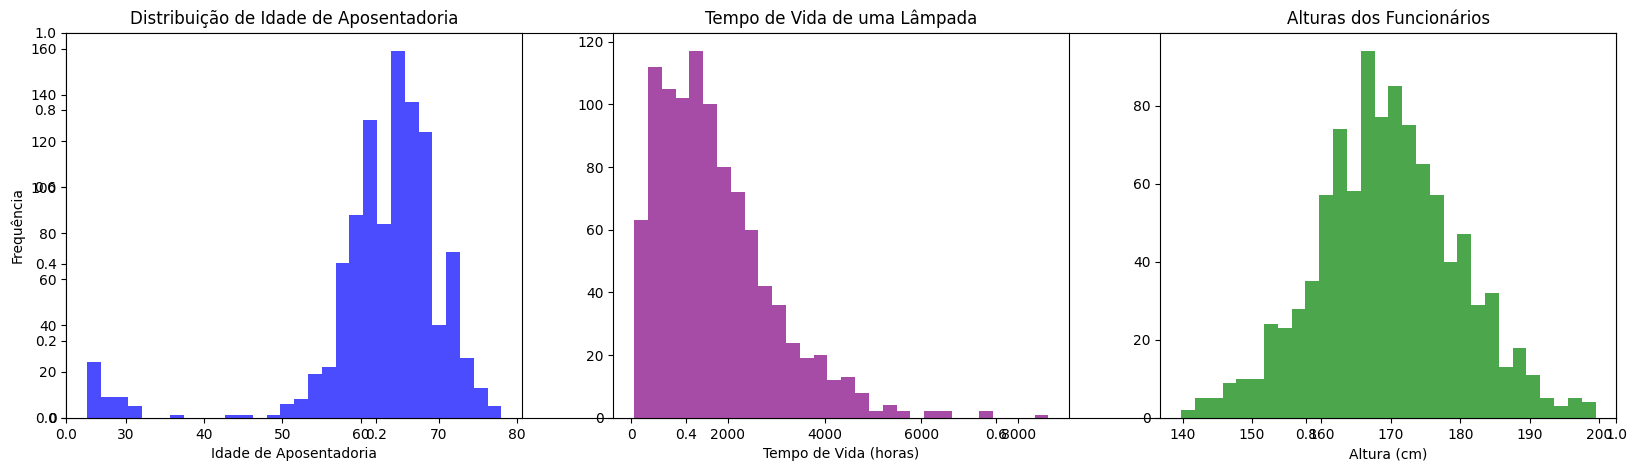

In [ ]:
# Várias distribuições
plt.subplots(figsize=(20, 5))
plt.subplot(131)
plt.title('Distribuição de Idade de Aposentadoria')
plt.xlabel('Idade de Aposentadoria')
plt.ylabel('Frequência')
plt.hist(dados_idade_aposentadoria, bins=30, alpha=0.7, color='blue')

plt.subplot(132)
plt.hist(dados_vida_lampada, bins=30, alpha=0.7, color='purple')
plt.title('Tempo de Vida de uma Lâmpada')
plt.xlabel('Tempo de Vida (horas)')

plt.subplot(133)
plt.hist(dados_alturas, bins=30, alpha=0.7, color='green')
plt.title('Alturas dos Funcionários')
plt.xlabel('Altura (cm)')

plt.show()

Reamostragem de dados de uma indústria de lâmpadas:


In [ ]:
from os import replace
#Tamanho de amostra de cada
n = 100

#Quantidade de amostras
qtd = 1000

#Função de reamostragem e cálculo de médias
def reamostragem_medias(dados, coluna, n, qtd):
  medias = [dados[coluna].sample(n, replace=True).mean()for _ in range(qtd)]
  return medias

Aplicando a função em cada distribuição:

In [ ]:
media_idade = reamostragem_medias(dados_idade_aposentadoria, 'idade', n, qtd)
media_duracao = reamostragem_medias(dados_vida_lampada, 'duracao', n, qtd)
media_altura = reamostragem_medias(dados_alturas, 'alturas', n, qtd)

Médias das distribuições originais:

In [ ]:
print('idade', dados_idade_aposentadoria['idade'].mean())
print('duracao', dados_vida_lampada['duracao'].mean())
print('alturas', dados_alturas['alturas'].mean())

idade 62.70857142857143
duracao 1731.8036029420002
alturas 169.52022


Médias Amostrais:

In [ ]:
def Average(lst):
  return sum(lst) / len(lst)

print('idade', Average(media_idade))
print('duracao', Average(media_duracao))
print('altura', Average(media_altura))

idade 62.72750999999999
duracao 1728.0148335706197
altura 169.48874810000012


Distribuição das médias com subplots:

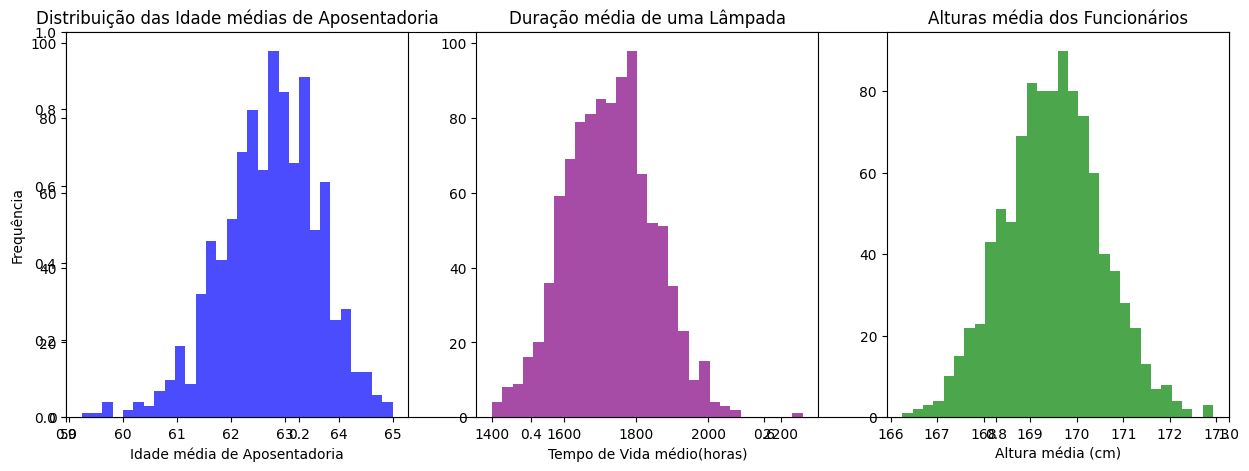

In [ ]:
plt.subplots(figsize=(15, 5))
plt.subplot(131)
plt.title('Distribuição das Idade médias de Aposentadoria')
plt.xlabel('Idade média de Aposentadoria')
plt.ylabel('Frequência')
plt.hist(media_idade, bins=30, alpha=0.7, color='blue')

plt.subplot(132)
plt.hist(media_duracao, bins=30, alpha=0.7, color='purple')
plt.title('Duração média de uma Lâmpada')
plt.xlabel('Tempo de Vida médio(horas)')

plt.subplot(133)
plt.hist(media_altura, bins=30, alpha=0.7, color='green')
plt.title('Alturas média dos Funcionários')
plt.xlabel('Altura média (cm)')

plt.show()

Média da nova amostra:

In [ ]:
media_nova_amostra = 1200

Média orginal:

In [ ]:
dados_vida_lampada['duracao'].mean()

np.float64(1731.8036029420002)

Quão distante essa média está do comportamento?



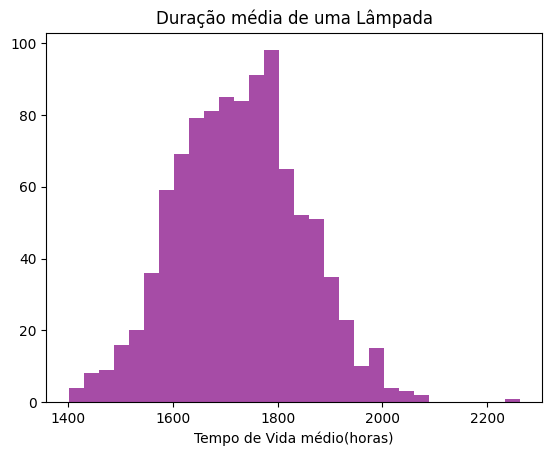

In [ ]:
plt.hist(media_duracao, bins=30, alpha=0.7, color='purple')
plt.title('Duração média de uma Lâmpada')
plt.xlabel('Tempo de Vida médio(horas)')
plt.annotate('.', xy=(media_nova_amostra, 0), xytext=(media_nova_amostra, 100), fontsize=8,
             arrowprops=dict(facecolor='green'))
plt.show()

Transformando media_duracao em DataFrame:

In [ ]:
duracao_amostra = pd.DataFrame({'media_duracao': media_duracao})

Calculando informações:

In [ ]:
media_das_medias = duracao_amostra['media_duracao'].mean()
erro_padrao = duracao_amostra['media_duracao'].std()

print('Médias amostrais')
print('média:', media_das_medias)
print('desvio padrão:', erro_padrao)

Médias amostrais
média: 1728.01483357062
desvio padrão: 121.07205190890751


Quantos erros:

In [ ]:
1731 - 3*erro_padrao

1367.7838442732775

Visualizando a quantidade de amostras entre 3EP +- da média

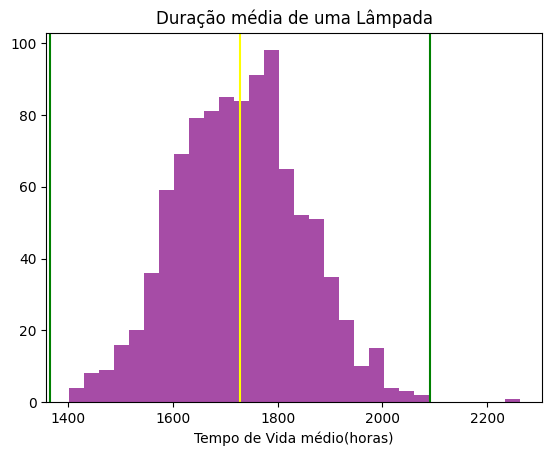

In [ ]:
plt.hist(media_duracao, bins=30, alpha=0.7, color='purple')
plt.title('Duração média de uma Lâmpada')
plt.xlabel('Tempo de Vida médio(horas)')
plt.axvline(x=media_das_medias, color = 'yellow')
plt.axvline(x=media_das_medias + 3*erro_padrao, color = 'green')
plt.axvline(x=media_das_medias - 3*erro_padrao, color = 'green')
plt.annotate('.', xy=(media_nova_amostra, 0), xytext=(media_nova_amostra, 100), fontsize=8,
             arrowprops=dict(facecolor='green'))
plt.show()

Verificando quantas amostras estão entre dos desvios:

In [ ]:
qnt_obs = duracao_amostra[(duracao_amostra > media_das_medias - 3*erro_padrao) &
                (duracao_amostra < media_das_medias + 3*erro_padrao)]

O quanto essas informações representam do todo:

In [ ]:
qnt_obs.count()/duracao_amostra.count()*100

,0
media_duracao,99.9


 Criando a margem de erro para saber se aciona ou nao o controle de qualidade:

In [ ]:
from scipy import stats

In [ ]:
# levar em consideração essa amostra
dados_vida_lampada

# nível de confiança definido
confianca = 0.95

Informações para calcular o intervalo de confiança:

In [ ]:
media = dados_vida_lampada['duracao'].mean()
desvio_padrao_amostra = dados_vida_lampada['duracao'].std()
tamanho_amostra = len(dados_vida_lampada)

In [ ]:
intervalo_confianca = stats.norm.interval(confianca, loc = media, scale = desvio_padrao_amostra / np.sqrt(tamanho_amostra))

In [ ]:
print('IC (95%):', intervalo_confianca)

IC (95%): (np.float64(1658.3741665835485), np.float64(1805.233039300452))


Caso 3: Estabelecer a duração de novas lampadas

- Se a duração média é igual ou diferente de 1570 horas

h0 = hipótese nula
* Duração média é igual a 1570 horas

h1 = hipótese alternativa
* Duração média ***não*** é igual a 1570 horas



In [ ]:
lampadas_natalinas = pd.read_csv('/content/experimento_lampadas_natalinas.csv')


In [ ]:
#Média amostral
lampadas_natalinas['duracao'].mean()

np.float64(1529.5081310675512)

In [ ]:
#Informações para a região crítica

confianca = 0.95
desvio_padrao_populacional = 105
tamanho_amostra = len(lampadas_natalinas['duracao'])

In [ ]:
#Calculando a margem de erro dentro do intervalo de confiança(REGIÃO CRÍTICA)
#Formula do erro padrão

intervalo = stats.norm.interval(confianca, loc = 1570, scale = desvio_padrao_populacional / np.sqrt(tamanho_amostra))

In [ ]:
print('Intervalo de confiançar (95%): ', intervalo)
#Hipótese nula rejeitada (1529), pois não está dentro do IC (1549 - 1590)

Intervalo de confiançar (95%):  (np.float64(1549.4203781623294), np.float64(1590.5796218376706))


Calculando o erro em cima da nossa decisão:
- Suponhamos que estamos no cenário errado, o cenário em que H₀ é verdadeira, ou seja, as lâmpadas estão durando 1.570 horas, em média.

In [ ]:
#Importando o teste Z do statsmodels
from statsmodels.stats.weightstats import ztest

In [ ]:
#Executando o teste Z

stats, p_valor = ztest(x1 = lampadas_natalinas['duracao'], value = 1570, alternative = 'two-sided')


In [ ]:
#Média amostral
lampadas_natalinas['duracao'].mean()

np.float64(1529.5081310675512)

In [ ]:
#Exibindo os resultados

print(p_valor)

0.0


Caso 4: Nível de serviço (SLA)

- Será que o tempo média de resposta de suporte técnico é menor que 30 minutos?

h0 : Tempo médio do surpote é igual a 30 minutos.

h1 : Tempo médio é menor que 30 minutos.

- Quais são os tempos de suporte coletados pela equipe?

In [ ]:
# Tempo de resposta em minutos para 25 solicitações de suporte
tempo_resposta = [28, 32, 29, 31, 30, 33, 28, 30, 31, 29,
                  30, 32, 29, 31, 30, 33, 28, 30, 31, 29,
                  30, 32, 24, 29, 30]

In [ ]:
# Média coletada do tempo
np.mean(tempo_resposta)


np.float64(29.96)

Realizando um teste para saber se 29.96 é válida ou nao

In [ ]:
# importando tttes_1samp
from scipy.stats import ttest_1samp

In [ ]:
# Realiza o teste t unilateral para um amostra
stats, p_valor = ttest_1samp(tempo_resposta, 30, alternative= "less")




In [ ]:
print(p_valor)

0.4585970095667924


Interpretando o Teste T

In [ ]:
nivel_significancia = 0.05

if p_valor < nivel_significancia:
  print('Rejeitar H0')
else:
  print('Aceitar H0')

Aceitar H0


Caso 5: Vendas VS Anúncio - Comparando duas amostras

- A propaganda produz efeito positivo nas vendas?


In [ ]:
vendas_com_propaganda = [329.80, 291.70, 338.86, 391.38, 285.95, 285.95, 394.75, 346.05, 271.83, 332.55, 272.19, 272.06, 314.52, 185.20, 196.50, 266.26, 239.23, 318.85, 245.52, 215.26, 387.94, 286.45, 304.05, 214.52, 267.34, 306.66, 230.94, 322.54, 263.96, 282.50, 263.90, 411.14, 299.19, 236.54, 349.35, 226.75, 312.53, 182.42, 220.31, 311.81, 344.31, 310.28, 293.66, 281.93, 211.29, 256.81, 272.36, 363.43, 320.62, 194.22]

In [ ]:
vendas_sem_propaganda = [304.44, 261.89, 244.38, 321.70, 346.86, 348.08, 234.65, 266.45, 304.88, 343.53, 256.25, 273.86, 218.62, 213.23, 333.75, 366.37, 280.68, 345.21, 306.70, 246.29, 306.68, 377.28, 282.85, 378.88, 127.82, 334.31, 290.22, 267.06, 290.51, 165.74, 271.82, 306.43, 373.67, 253.90, 236.49, 254.89, 339.92, 304.73, 253.21, 315.80, 292.80, 343.12, 242.88, 265.34, 261.47, 197.19, 302.77, 300.66, 285.31, 270.92]

In [ ]:
# Média com
print(np.mean(vendas_com_propaganda))

# Média sem
print(np.mean(vendas_sem_propaganda))

286.4832
286.2498


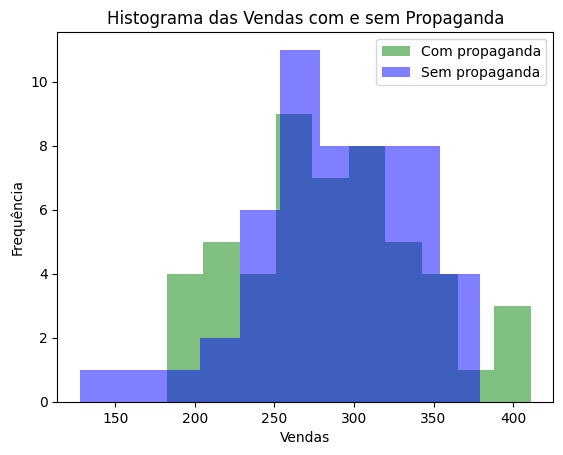

In [ ]:
# Criar histogramas
plt.hist(vendas_com_propaganda, color = "green", alpha = 0.5, label = "Com propaganda")
plt.hist(vendas_sem_propaganda, color = "blue", alpha = 0.5, label = "Sem propaganda")
# Adicionar rótulos e título
plt.xlabel('Vendas')
plt.ylabel('Frequência')
plt.title('Histograma das Vendas com e sem Propaganda')
plt.legend()
plt.show()

Hipóteses desse teste de amostras independentes:

H0: media sem = media com

H1: media sem < media com

In [ ]:
# Teste T para amostrais independentes (ttest_ind)
from scipy.stats import ttest_ind

In [ ]:
# Aplicação do teste t de Student para amostras independentes
stats, p_valor = ttest_ind(vendas_com_propaganda, vendas_sem_propaganda, alternative= "greater")

In [ ]:
print(p_valor)

0.49145652153110797


In [ ]:
alpha = 0.05
if p_valor < alpha:
    print("Rejeitar a hipótese nula: Há evidências de que a propaganda tem um efeito positivo nas vendas.")
else:
    print("Não rejeita hipótese nula: Não há evidências suficientes para afirmar um efeito positivo nas vendas devido à propaganda.")

Não rejeita hipótese nula: Não há evidências suficientes para afirmar um efeito positivo nas vendas devido à propaganda.


Caso 6: Notas antes e depois

Analise: O treinamento para equipe de atendimento promoveu diferença nas avaliações?

In [ ]:
antes_do_treinamento =[78, 65, 75, 80, 85, 88, 79, 81, 76, 84]
apos_o_treinamento = [85, 70, 75, 87, 90, 92, 84, 82, 76, 91]

In [ ]:
# Comparando antes e depois
resultado_subtracao = [b - a for a, b in zip(antes_do_treinamento,apos_o_treinamento)]

In [ ]:
resultado_subtracao

[7, 5, 0, 7, 5, 4, 5, 1, 0, 7]

Descobrindo se o aumento nas avaliações foi significativo:

H0: m = 0

H1: m >

* m é a média das diferenças dos pares.

In [ ]:
# importando o teste pareado ttest_rel
from scipy.stats import ttest_rel

In [ ]:
# aplicando o teste pareado
stats, p_valor = ttest_rel(apos_o_treinamento, antes_do_treinamento, alternative='greater')

In [ ]:
p_valor

np.float64(0.000627744161772394)

Caso 7: treino A vs treino B

* Há diferenças significativas nos ganhos de desempenho entre os grupos treino A e treino B?


In [ ]:
# Dados de desempenho dos dois grupos
treino_a = [5, 3, 8, 4, 6]
treino_b = [4, 2, 7, 5, 3]

In [ ]:
# Importando teste mannwhitneyu
from scipy.stats import mannwhitneyu

H0: As distribuições das duas populações são iguais.

H1: As distribuições das duas populações são diferentes.

In [ ]:
# Aplicando o teste de mannwhitneyu

stats, p_valor = mannwhitneyu(treino_a, treino_b, alternative='two-sided')

In [ ]:
p_valor

np.float64(0.4605966187047713)

Caso 8: Layout antes e depois

* Não há diferença significativa nas preferências antes e depois da mudança na disposição dos equipamentos na academia.

In [ ]:
# Preferências dos consumidores antes e depois da mudança no layout
preferencias_antes = [4, 2, 5, 2, 5, 6, 7, 8, 9, 10 ]
preferencias_depois = [8, 5, 3, 5, 8, 9, 9, 9, 10, 9]

In [ ]:
#diferenças de percepção
resultado_subtracao = [b - a for a, b in zip(preferencias_antes,preferencias_depois)]
resultado_subtracao

[4, 3, -2, 3, 3, 3, 2, 1, 1, -1]

In [ ]:
# Média
np.mean(resultado_subtracao)

np.float64(1.7)

In [ ]:
# Mediana
np.median(resultado_subtracao)

np.float64(2.5)

H0: A mediana das diferenças entre os pares é zero.

H1: A mediana das diferenças entre os pares não é zero.

In [ ]:
# Importanto teste de wilcoxon
from scipy.stats import wilcoxon

In [ ]:
# Realiza o teste de wilcoxon para amostras pareadas
stats, p_valor = wilcoxon(preferencias_depois, preferencias_antes, alternative="greater")

In [ ]:
p_valor

np.float64(0.015625)

In [ ]:
nivel_significancia=0.05

if p_valor < nivel_significancia:
    conclusao = "Rejeitar a hipótese nula"
else:
    conclusao = "Não rejeita a hipótese nula"
conclusao

'Rejeitar a hipótese nula'